# 2: Load

Now we'll start with a fresh, clean file and reinstate the model we built in [part 1](save.ipynb). From the end of this document we'll be ready to either continue training or run the model to classify images.

We begin by loading the libraries and the MNIST dataset.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

sess = tf.InteractiveSession()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Import the graph

The following two lines import the meta graph, which contains all the information we need on the topology of the model and its variables, and then import the checkpoint file, which contains the weights we developed during training. In the second line, we explicitly load the checkpoint data into the current session, the variable `sess`.

In [2]:
new_saver = tf.train.import_meta_graph('saved_mnist_cnn.ckpt.meta')
new_saver.restore(sess, 'saved_mnist_cnn.ckpt')

We can confirm that this worked by taking a look at the current `GraphDef`. I won't run this in the version of the notebook on Github because the output takes up tons of space, but if you run this at home you'll see all the nodes in the TensorFlow graph represented in a big JSON list.

In [ ]:
tf.get_default_graph().as_graph_def()

## Associate variables

Indeed, everything we expect is there in the `GraphDef`. The problem is that we can't just start calling the Python variables we used in the save file: `y_conv` (our output) and `x` and `keep_prob` (our inputs). We first need to define some Python variables and associate them with the TensorFlow nodes that we need handle in order to feed input and retrieve output.

We do that like this:

In [3]:
x = sess.graph.get_tensor_by_name("input:0")
y_conv = sess.graph.get_tensor_by_name("output:0")
keep_prob = sess.graph.get_tensor_by_name("keep_prob:0")

Now `x`, `y_conv`, and `keep_prob` are fully defined Python variables that refer to TensorFlow nodes. They operate just like they did when we left off in part 1.

Note that we defined many more nodes than these three back in part 1: `W_conv1`, `b_conv1`, and so on. One cool thing about the way TensorFlow handles these graphs is that you don't need to reinstate any of the intermediate nodes in order to run the model; TensorFlow understands the relationship between them and will run them properly even if they don't have Python variables associated with them.

To demonstrate, let's test the model like we did in part 1. Here we take an arbitrary image from the MNIST validation set and display it.

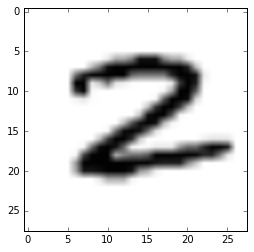

In [4]:
image_b = mnist.validation.images[159]
plt.imshow(image_b.reshape([28, 28]), cmap='Greys')

And now we run the model.

In [5]:
image_b = image_b.reshape([1, 784])
result = sess.run(y_conv, feed_dict={x:image_b, keep_prob:1})
print(result)
print(sess.run(tf.argmax(result, 1)))

[[  3.63468689e-06   3.87002473e-07   9.99598205e-01   1.59243267e-04
    8.94278696e-09   4.08969534e-08   2.78706466e-07   1.72356682e-04
    6.52213712e-05   8.37815264e-07]]
[2]


## Confirmed!

Now we're back to exactly where we were at the end of [part 1](save.ipynb), at least with respect to the model's inputs and outputs. If we need access to any of the intermediate layers, we can retrieve them and point to them with Python variables like we did with `y_conv`, `x`, and `keep_prob`.